In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l2

#Load the cats VS dogs Dataset

In [ ]:
#Run the cells of this section to get the data in (x_train,y_train), (x_test,y_test)

In [ ]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 71.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 60.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 211MB/s]
Archive:  /content/cats_test.zip
   creating: cats_and_dogs_small/test/cats/
  inflating: cats_and_dogs_small/test/cats/cat.1699.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1984.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1612.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1658.jpg  
  inflating: cats

In [ ]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


In [ ]:
cats_train = np.ndarray((len(cats_train_images),150,150,3), dtype= np.int32)
cats_test = np.ndarray((len(cats_test_images),150,150,3), dtype= np.int32)
dogs_train = np.ndarray((len(dogs_train_images),150,150,3), dtype= np.int32)
dogs_test = np.ndarray((len(dogs_test_images),150,150,3), dtype= np.int32)

for i,img_name in enumerate(cats_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/cats/" + img_name).resize((150,150))
  cats_train[i] = np.asarray(img)

for i,img_name in enumerate(cats_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/cats/" + img_name).resize((150,150))
  cats_test[i] = np.asarray(img)

for i,img_name in enumerate(dogs_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/dogs/" + img_name).resize((150,150))
  dogs_train[i] = np.asarray(img)

for i,img_name in enumerate(dogs_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/dogs/" + img_name).resize((150,150))
  dogs_test[i] = np.asarray(img)

In [ ]:
training_images = np.concatenate((cats_train,dogs_train), axis=0)
testing_images = np.concatenate((cats_test,dogs_test), axis=0)

training_labels = np.concatenate((np.ones(len(cats_train),dtype= np.int32), \
                                  np.zeros(len(dogs_train),dtype= np.int32)))
testing_labels = np.concatenate((np.ones(len(cats_test),dtype= np.int32), \
                                 np.zeros(len(dogs_test),dtype= np.int32)))

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)
(2000,)
(1000,)


In [ ]:
training_shuffler = np.random.permutation(len(training_images))
x_train = training_images[training_shuffler]
y_train = training_labels[training_shuffler].reshape(2000,-1)

testing_shuffler = np.random.permutation(len(testing_images))
x_test = testing_images[testing_shuffler]
y_test = testing_labels[testing_shuffler].reshape(1000,-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


#Exploratory Data Analysis



class: 1


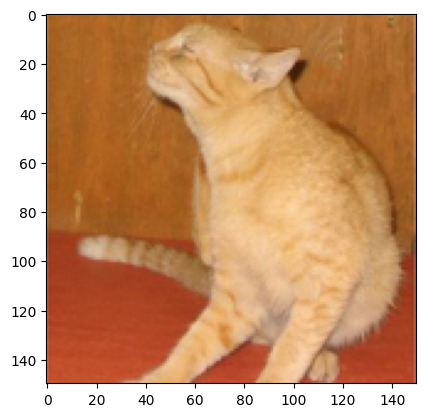

In [ ]:
# See classes
plt.imshow(x_train[0])
print(f'class: {y_train[0][0]}')

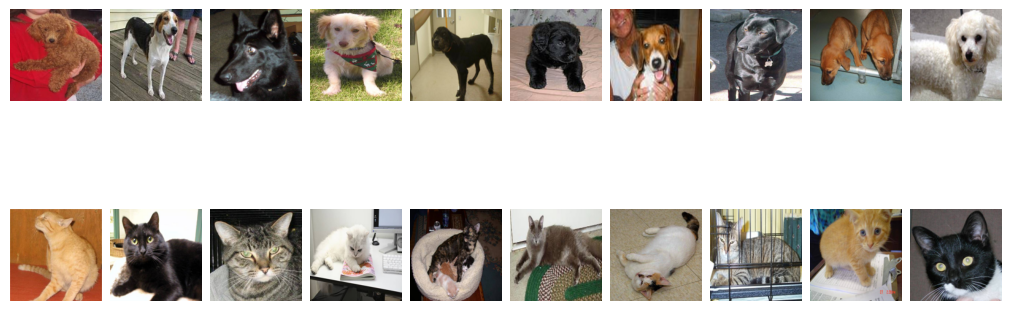

In [ ]:
#Take a minute to explore the data
#show 10 images from each class
fig, axes = plt.subplots(figsize = (10,4), nrows=2, ncols=10, constrained_layout=True)
for classs in range(2):
  for example in range(10):
    _ = axes[classs][example].set_axis_off()
    _ = axes[classs][example].imshow(x_train[np.where(y_train==classs)[0][example]])

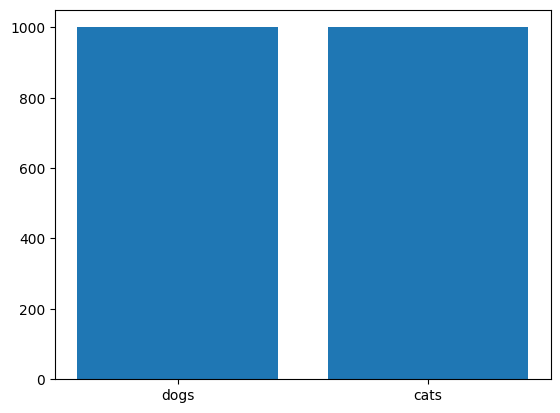

In [ ]:
fig, ax = plt.subplots()
y_labels, y_counts = np.unique(y_train, return_counts=True)
ax.bar(y_labels, y_counts)
ax.set_xticks(y_labels)
ax.set_xticklabels(['dogs', 'cats'])
plt.show()

#Data preproceesing

In [ ]:
#Normalize images pixels values in range [0,1]
x_train_original = x_train
x_test_original = x_test

x_train = (x_train.astype('float32') / 255)
x_test = (x_test.astype('float32') / 255)

print(x_train.shape)
print(x_test.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)


In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(2000, 67500)
(1000, 67500)


In [ ]:
from keras.utils import to_categorical
y_train_reshaped = to_categorical(y_train)
y_test_reshaped  = to_categorical(y_test)

print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(2000, 2)
(1000, 2)


#Classify the data using Dense Layers

In [ ]:
#Build a FCNN model to classify the data into cats and dogs
#You may use the same Architecture we used for CIFAR10 or any other Architecture
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (55% --> 60%)
#Hint: look for 'early stopping' and use it

In [ ]:
from keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(150*150*3,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               34560512  
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 256)              

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train_reshaped, y_train_reshaped, epochs=32, batch_size=64, validation_data=(x_test_reshaped, y_test_reshaped), callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 6s 71ms/step - loss: 1.2285 - accuracy: 0.4930 - val_loss: 1.6336 - val_accuracy: 0.4880
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 1.0364 - accuracy: 0.5140 - val_loss: 0.8481 - val_accuracy: 0.5430
Epoch 3/20
32/32 [==============================] - 1s 40ms/step - loss: 0.9713 - accuracy: 0.5020 - val_loss: 0.7343 - val_accuracy: 0.5050
Epoch 4/20
32/32 [==============================] - 1s 41ms/step - loss: 0.8800 - accuracy: 0.5320 - val_loss: 0.7506 - val_accuracy: 0.5330
Epoch 5/20
32/32 [==============================] - 2s 73ms/step - loss: 0.8503 - accuracy: 0.5400 - val_loss: 0.7011 - val_accuracy: 0.5470
Epoch 6/20
32/32 [==============================] - 2s 55ms/step - loss: 0.8211 - accuracy: 0.5130 - val_loss: 0.6846 - val_accuracy: 0.5640
Epoch 7/20
32/32 [==============================] - 1s 41ms/step - loss: 0.7731 - accuracy: 0.5345 - val_loss: 0.6774 - val_accuracy: 0.5540
Epoch 8/20
32

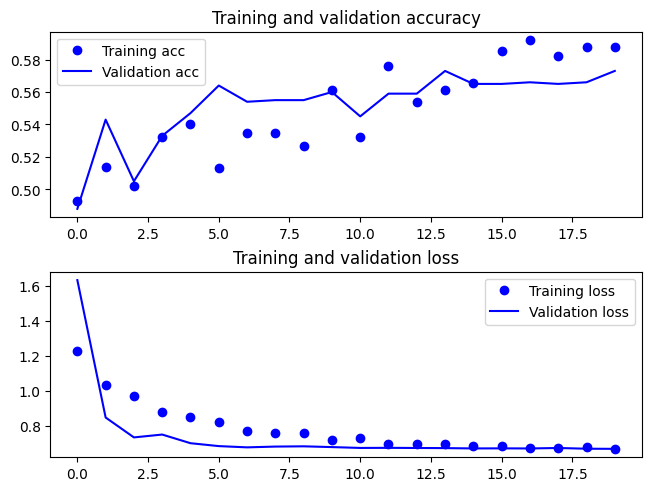

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

_ = ax1.plot(epochs, acc, 'bo', label='Training acc')
_ = ax1.plot(epochs, val_acc, 'b', label='Validation acc')
_ = ax1.set_title('Training and validation accuracy')
_ = ax1.legend()

_ = ax2.plot(epochs, loss, 'bo', label='Training loss')
_ = ax2.plot(epochs, val_loss, 'b', label='Validation loss')
_ = ax2.set_title('Training and validation loss')
_ = ax2.legend()

#Classify the data using ConvNets

In [ ]:
#Build a CNN model to classify the data into cats and dogs
#The model Architecture is as follows:
  #1. conv layer with 32 filters of size (3,3) and relu activation
  #2. max pooling layer with filter size (2,2), stride= 2
  #3. conv layer with 64 filters of size (3,3) and relu activation
  #4. max pooling layer with filter size (2,2), stride= 2
  #5. conv layer with 128 filters of size (3,3) and relu activation
  #6. max pooling layer with filter size (2,2), stride= 2
  #7. conv layer with 128 filters of size (3,3) and relu activation
  #8. max pooling layer with filter size (2,2), stride= 2
  #9. Dense Layer with 512 neurons and relu activation
  #10.Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (65% -- 70%)



NOTE: I've tried adjusting hyperparameters many times to get the best model, we can also use sth like cross-validation and do a loop for out hyperparam and select the best one.




In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
from keras.optimizers import Adam

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile('Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train_reshaped, epochs=20, batch_size=64, validation_data=(x_test, y_test_reshaped), callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 9s 129ms/step - loss: 2.5519 - accuracy: 0.4975 - val_loss: 1.1361 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 2s 58ms/step - loss: 0.9642 - accuracy: 0.5125 - val_loss: 0.8428 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 2s 56ms/step - loss: 0.7967 - accuracy: 0.5000 - val_loss: 0.7606 - val_accuracy: 0.5030
Epoch 4/20
32/32 [==============================] - 2s 55ms/step - loss: 0.7426 - accuracy: 0.5180 - val_loss: 0.7279 - val_accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 2s 57ms/step - loss: 0.7156 - accuracy: 0.5140 - val_loss: 0.7089 - val_accuracy: 0.5510
Epoch 6/20
32/32 [==============================] - 2s 56ms/step - loss: 0.7053 - accuracy: 0.5465 - val_loss: 0.6980 - val_accuracy: 0.5520
Epoch 7/20
32/32 [==============================] - 2s 56ms/step - loss: 0.6953 - accuracy: 0.5555 - val_loss: 0.6967 - val_accuracy: 0.5270
Epoch 8/20
3

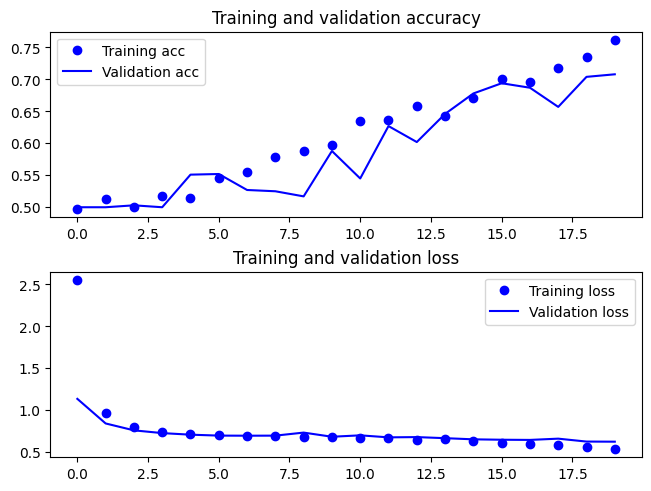

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

_ = ax1.plot(epochs, acc, 'bo', label='Training acc')
_ = ax1.plot(epochs, val_acc, 'b', label='Validation acc')
_ = ax1.set_title('Training and validation accuracy')
_ = ax1.legend()

_ = ax2.plot(epochs, loss, 'bo', label='Training loss')
_ = ax2.plot(epochs, val_loss, 'b', label='Validation loss')
_ = ax2.set_title('Training and validation loss')
_ = ax2.legend()

#Transfer Learning (VGG16)

In [ ]:
#Build a model with the help of a pretrained network (VGG16)
#Hint: search for "how to use VGG16 for Transfer Learning in Keras"
#The model Architecture is as follows:
  #1. the conv base of VGG16 (non trainable)
  #2. Dense Layer with 256 neurons and relu activation
  #3. Output layer
#Train the model
#plot loss and accuracy curves
#you should get validation accuracy of about (85% -- 90%)


In [ ]:
x_train_preprocessed = preprocess_input(x_train_original)
x_test_preprocessed = preprocess_input(x_test_original)

In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()

for layer in vgg16_model.layers[:-1]:
  layer.trainable = False
  model.add(layer)

model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train_preprocessed, y_train_reshaped, epochs=4, batch_size=32, validation_data=(x_test_preprocessed, y_test_reshaped))

Epoch 1/4
63/63 [==============================] - 57s 128ms/step - loss: 4.5883 - accuracy: 0.9255 - val_loss: 0.8021 - val_accuracy: 0.9640
Epoch 2/4
63/63 [==============================] - 7s 104ms/step - loss: 0.3263 - accuracy: 0.9815 - val_loss: 0.6987 - val_accuracy: 0.9600
Epoch 3/4
63/63 [==============================] - 7s 106ms/step - loss: 0.0860 - accuracy: 0.9920 - val_loss: 1.4865 - val_accuracy: 0.9520
Epoch 4/4
63/63 [==============================] - 7s 113ms/step - loss: 0.0670 - accuracy: 0.9960 - val_loss: 1.0873 - val_accuracy: 0.9600


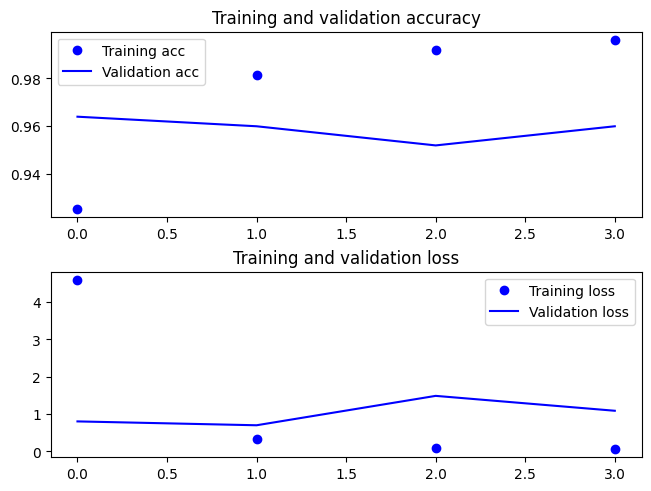

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

_ = ax1.plot(epochs, acc, 'bo', label='Training acc')
_ = ax1.plot(epochs, val_acc, 'b', label='Validation acc')
_ = ax1.set_title('Training and validation accuracy')
_ = ax1.legend()

_ = ax2.plot(epochs, loss, 'bo', label='Training loss')
_ = ax2.plot(epochs, val_loss, 'b', label='Validation loss')
_ = ax2.set_title('Training and validation loss')
_ = ax2.legend()

#Data Augmentation with Transfer Learning

In [ ]:
#Perform a brief search and try to understand what Data Augmentation means first.
#use Data Augmentation to enhance the Transfer Learning model performance
#Hint: search for ImageDataGenerator
#you should get validation accuracy of about (95% --> 97%)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

traingen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validationgen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Load your dataset
# For example, if you have a directory structure with 'train' and 'validation' folders:
train_generator = traingen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validationgen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()

for layer in vgg16_model.layers[:-1]:
  layer.trainable = False
  model.add(layer)

model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model with augmented data and early stopping
history = model.fit(
    train_generator,
    epochs=8,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

Epoch 1/8
63/63 [==============================] - 19s 281ms/step - loss: 1.9257 - accuracy: 0.8780 - val_loss: 0.6626 - val_accuracy: 0.9480
Epoch 2/8
63/63 [==============================] - 18s 288ms/step - loss: 0.5107 - accuracy: 0.9435 - val_loss: 0.4461 - val_accuracy: 0.9550
Epoch 3/8
63/63 [==============================] - 18s 283ms/step - loss: 0.2814 - accuracy: 0.9520 - val_loss: 0.3264 - val_accuracy: 0.9600
Epoch 4/8
63/63 [==============================] - 17s 275ms/step - loss: 0.2029 - accuracy: 0.9605 - val_loss: 0.3563 - val_accuracy: 0.9570
Epoch 5/8
63/63 [==============================] - 19s 300ms/step - loss: 0.1837 - accuracy: 0.9555 - val_loss: 0.2037 - val_accuracy: 0.9640
Epoch 6/8
63/63 [==============================] - 18s 278ms/step - loss: 0.1679 - accuracy: 0.9640 - val_loss: 0.2179 - val_accuracy: 0.9620
Epoch 7/8
63/63 [==============================] - 18s 285ms/step - loss: 0.1297 - accuracy: 0.9690 - val_loss: 0.2241 - val_accuracy: 0.9640
Epoch 

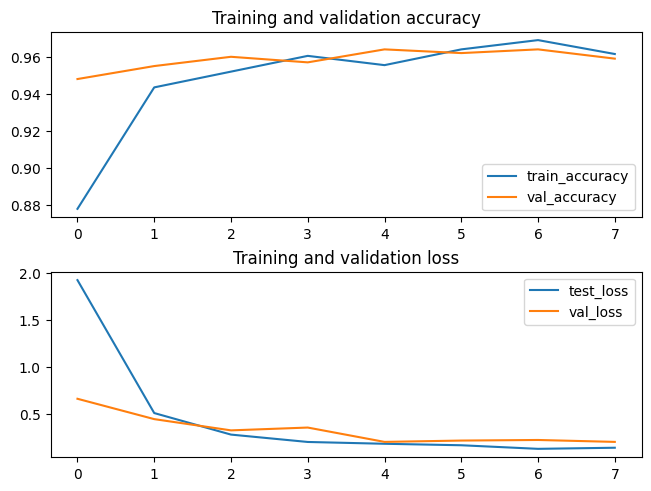

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
ax1.plot(epochs, acc, label='train_accuracy')
ax1.plot(epochs, val_acc, label='val_accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()


ax2.plot(epochs, loss, label='test_loss')
ax2.plot(epochs, val_loss, label='val_loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()
